In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

In [4]:
def scale_features(X, scalar=None):
    if(len(X.shape) == 1):
        X = X.reshape(-1, 1)
        
    if scalar == None:
        scalar = StandardScaler()
        scalar.fit(X)
        
    return scalar.transform(X), scalar

In [5]:
dataset = pd.read_csv('Advertising.csv')
dataset = dataset[["TV", "Radio", "Newspaper", "Sales"]]
dataset[:10]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [14]:
dataset.shape

(200, 5)

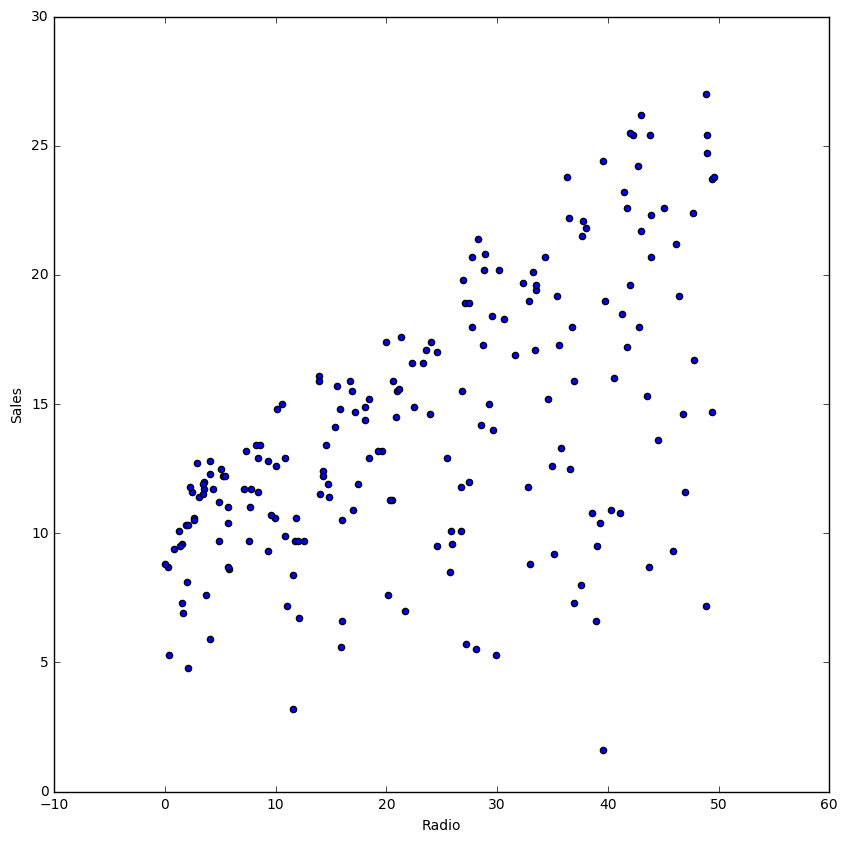

In [6]:
dataset.plot(kind = 'scatter', x = 'Radio', y = 'Sales')

In [7]:
dataset_size = len(dataset)
training_size = np.floor(dataset_size * .8).astype(int)

X_training = dataset["Radio"][:training_size]
y_training = dataset["Sales"][:training_size]

X_test = dataset["Radio"][training_size:]
y_test = dataset["Sales"][training_size:]

X_training, training_scalar = scale_features(X_training)
X_test,_ = scale_features(X_test, scalar=training_scalar)

In [8]:
model = SGDRegressor(loss='squared_loss')
model.fit(X_training, y_training)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [10]:
w0 = model.intercept_
w1 = model.coef_

print("Trained model: y = %0.2f + %0.2fx" % (w0, w1))

Trained model: y = 12.16 + 2.46x


In [12]:
MSE = np.mean((y_test - model.predict(X_test)) ** 2)

print("The test data MSE is: %0.3f" % (MSE))

The test data MSE is: 21.489


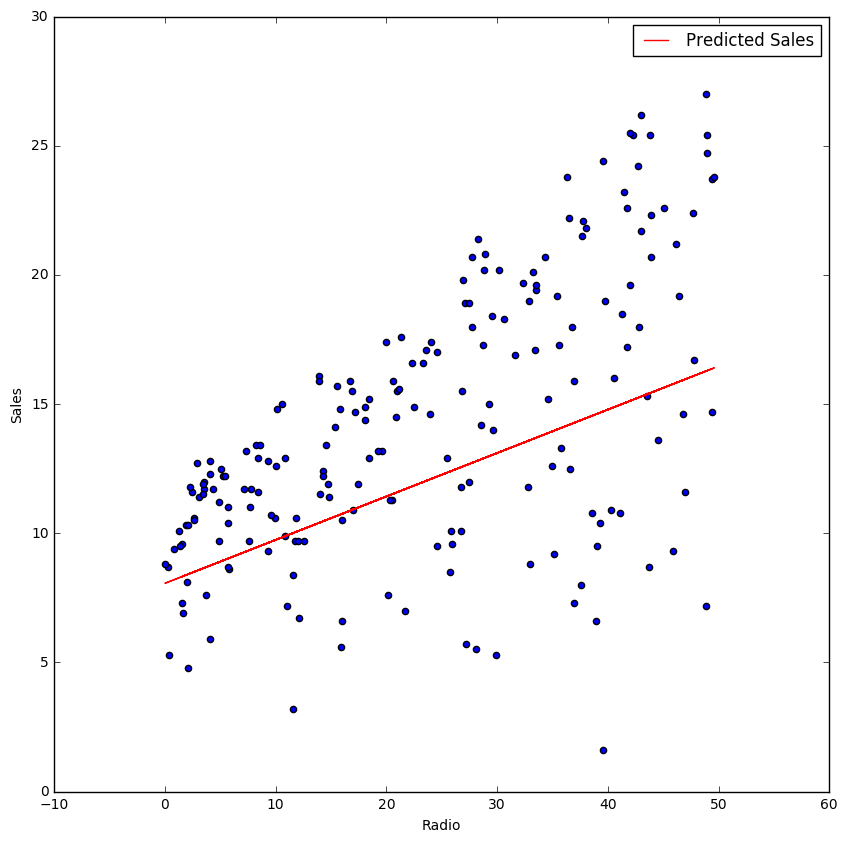

In [13]:
scaled_radio,_ = scale_features(dataset["Radio"], scalar = training_scalar)
dataset["Predicted Sales"] = model.predict(scaled_radio)

plot_ax = dataset.plot(kind = 'scatter', x = 'Radio', y = 'Sales')

dataset.plot(kind = 'line', x = 'Radio', y = 'Predicted Sales', color = 'red', ax = plot_ax, xlim = (-10, 60))